In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv("C:\\Datasets\\spotify\\spotify_top_charts_22.csv")
df.head()
df=df.sort_values(by='weeks_on_chart',ascending=False)
df.head()

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
139,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,Shape of You,1,269,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.0,0.0931,95.977,4,233713
198,spotify:track:5uCax9HTNlzGybIStD3vDh,James Arthur,Say You Won't Let Go,7,268,0.358,0.557,10,-7.398,1,0.0590,0.6950,0.0,0.0902,85.043,4,211467
91,spotify:track:0pqnGHJpmpxLKifKRmU6WP,Imagine Dragons,Believer,16,268,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.0,0.0810,124.949,4,204347
150,spotify:track:0tgVpDi06FyKpA1z0VMD4v,Ed Sheeran,Perfect,4,262,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.0,0.1060,95.050,3,263400
397,spotify:track:6gBFPUFcJLzWGx4lenP6h2,Travis Scott,goosebumps,13,226,0.841,0.728,7,-3.370,1,0.0484,0.0847,0.0,0.1490,130.049,4,243837


In [75]:
df.isnull().sum()

uri                 0
artist_names        0
track_name          0
peak_rank           0
weeks_on_chart      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [5]:
df.describe()

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,65.922601,19.498452,0.674426,0.640836,5.086687,-6.356034,0.577399,0.109797,0.255699,0.013686,0.176478,121.091571,3.927245,203629.859133
std,57.004503,37.813937,0.151527,0.165478,3.622314,2.627462,0.494356,0.102167,0.262595,0.077836,0.133792,28.267951,0.351256,54966.666438
min,1.000000,1.000000,0.193000,0.021800,0.000000,-31.160000,0.000000,0.023200,0.000017,0.000000,0.026400,66.165000,1.000000,36935.000000
25%,15.000000,1.000000,0.569000,0.532500,1.000000,-7.716250,0.000000,0.041325,0.040400,0.000000,0.093100,98.428500,4.000000,169901.500000
50%,51.500000,5.000000,0.700000,0.652000,5.000000,-5.930500,1.000000,0.063450,0.155500,0.000002,0.120000,119.966000,4.000000,196388.500000
75%,108.750000,19.750000,0.790750,0.769000,8.000000,-4.595750,1.000000,0.135750,0.424500,0.000105,0.231750,139.968250,4.000000,229213.500000
max,200.000000,269.000000,0.985000,0.972000,11.000000,-0.514000,1.000000,0.611000,0.969000,0.908000,0.968000,205.863000,5.000000,613027.000000


In [96]:
#i WILL DROP THE URL SINCE IT CAN NOT BE USED FOR ANALYSIS
df.drop(['uri'],axis=1,inplace=True)

In [9]:
df.columns

Index(['artist_names', 'track_name', 'peak_rank', 'weeks_on_chart',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [12]:
# Most streamed artist
def most_streamed(column,df=df):
    print(f"The most streamed artist is")
    print('\n')
    print(df[column].value_counts().head(10))

In [13]:
most_streamed('artist_names')
# The weekend has the most songs in the spotify list

The most streamed artist is


The Weeknd        20
Bad Bunny         19
Harry Styles      18
Beyoncé           14
Drake             13
Kendrick Lamar    12
Taylor Swift       8
Olivia Rodrigo     7
Future             7
BTS                7
Name: artist_names, dtype: int64


In [22]:
df.corr()

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
peak_rank,1.000000,-0.352513,-0.011647,0.064726,0.032814,0.030000,-0.024764,0.011428,-0.031194,0.068691,-0.001229,-0.019633,0.050590,-0.103052
weeks_on_chart,-0.352513,1.000000,-0.062471,-0.065588,0.017296,0.053077,0.024224,-0.111900,0.079944,-0.042685,-0.058650,-0.059967,0.004602,0.085232
danceability,-0.011647,-0.062471,1.000000,0.198659,0.048686,0.251823,-0.093857,0.161906,-0.256794,-0.210085,-0.043850,-0.123983,0.171192,-0.146848
energy,0.064726,-0.065588,0.198659,1.000000,0.032316,0.693982,0.002716,-0.015851,-0.593486,-0.086421,0.107749,0.044891,0.161359,0.014841
key,0.032814,0.017296,0.048686,0.032316,1.000000,0.014602,-0.133622,0.019584,-0.009935,-0.023292,-0.049959,-0.007750,0.052487,-0.015304
loudness,0.030000,0.053077,0.251823,0.693982,0.014602,1.000000,0.050395,-0.069213,-0.438896,-0.275508,0.084714,0.005892,0.084749,-0.072663
mode,-0.024764,0.024224,-0.093857,0.002716,-0.133622,0.050395,1.000000,-0.084125,0.007870,-0.002248,-0.038549,-0.039415,0.010159,0.011825
speechiness,0.011428,-0.111900,0.161906,-0.015851,0.019584,-0.069213,-0.084125,1.000000,0.016690,-0.103967,0.030005,0.065119,0.027899,-0.013127
acousticness,-0.031194,0.079944,-0.256794,-0.593486,-0.009935,-0.438896,0.007870,0.016690,1.000000,0.082146,-0.051540,-0.090607,-0.097380,-0.020754
instrumentalness,0.068691,-0.042685,-0.210085,-0.086421,-0.023292,-0.275508,-0.002248,-0.103967,0.082146,1.000000,-0.042919,-0.039019,-0.083326,0.036350


In [23]:
most_streamed('artist_names')

The most streamed artist is


The Weeknd        20
Bad Bunny         19
Harry Styles      18
Beyoncé           14
Drake             13
Kendrick Lamar    12
Taylor Swift       8
Olivia Rodrigo     7
Future             7
BTS                7
Name: artist_names, dtype: int64


Text(0.5, 1.0, 'A pairplot for our Spotify DataFrame')

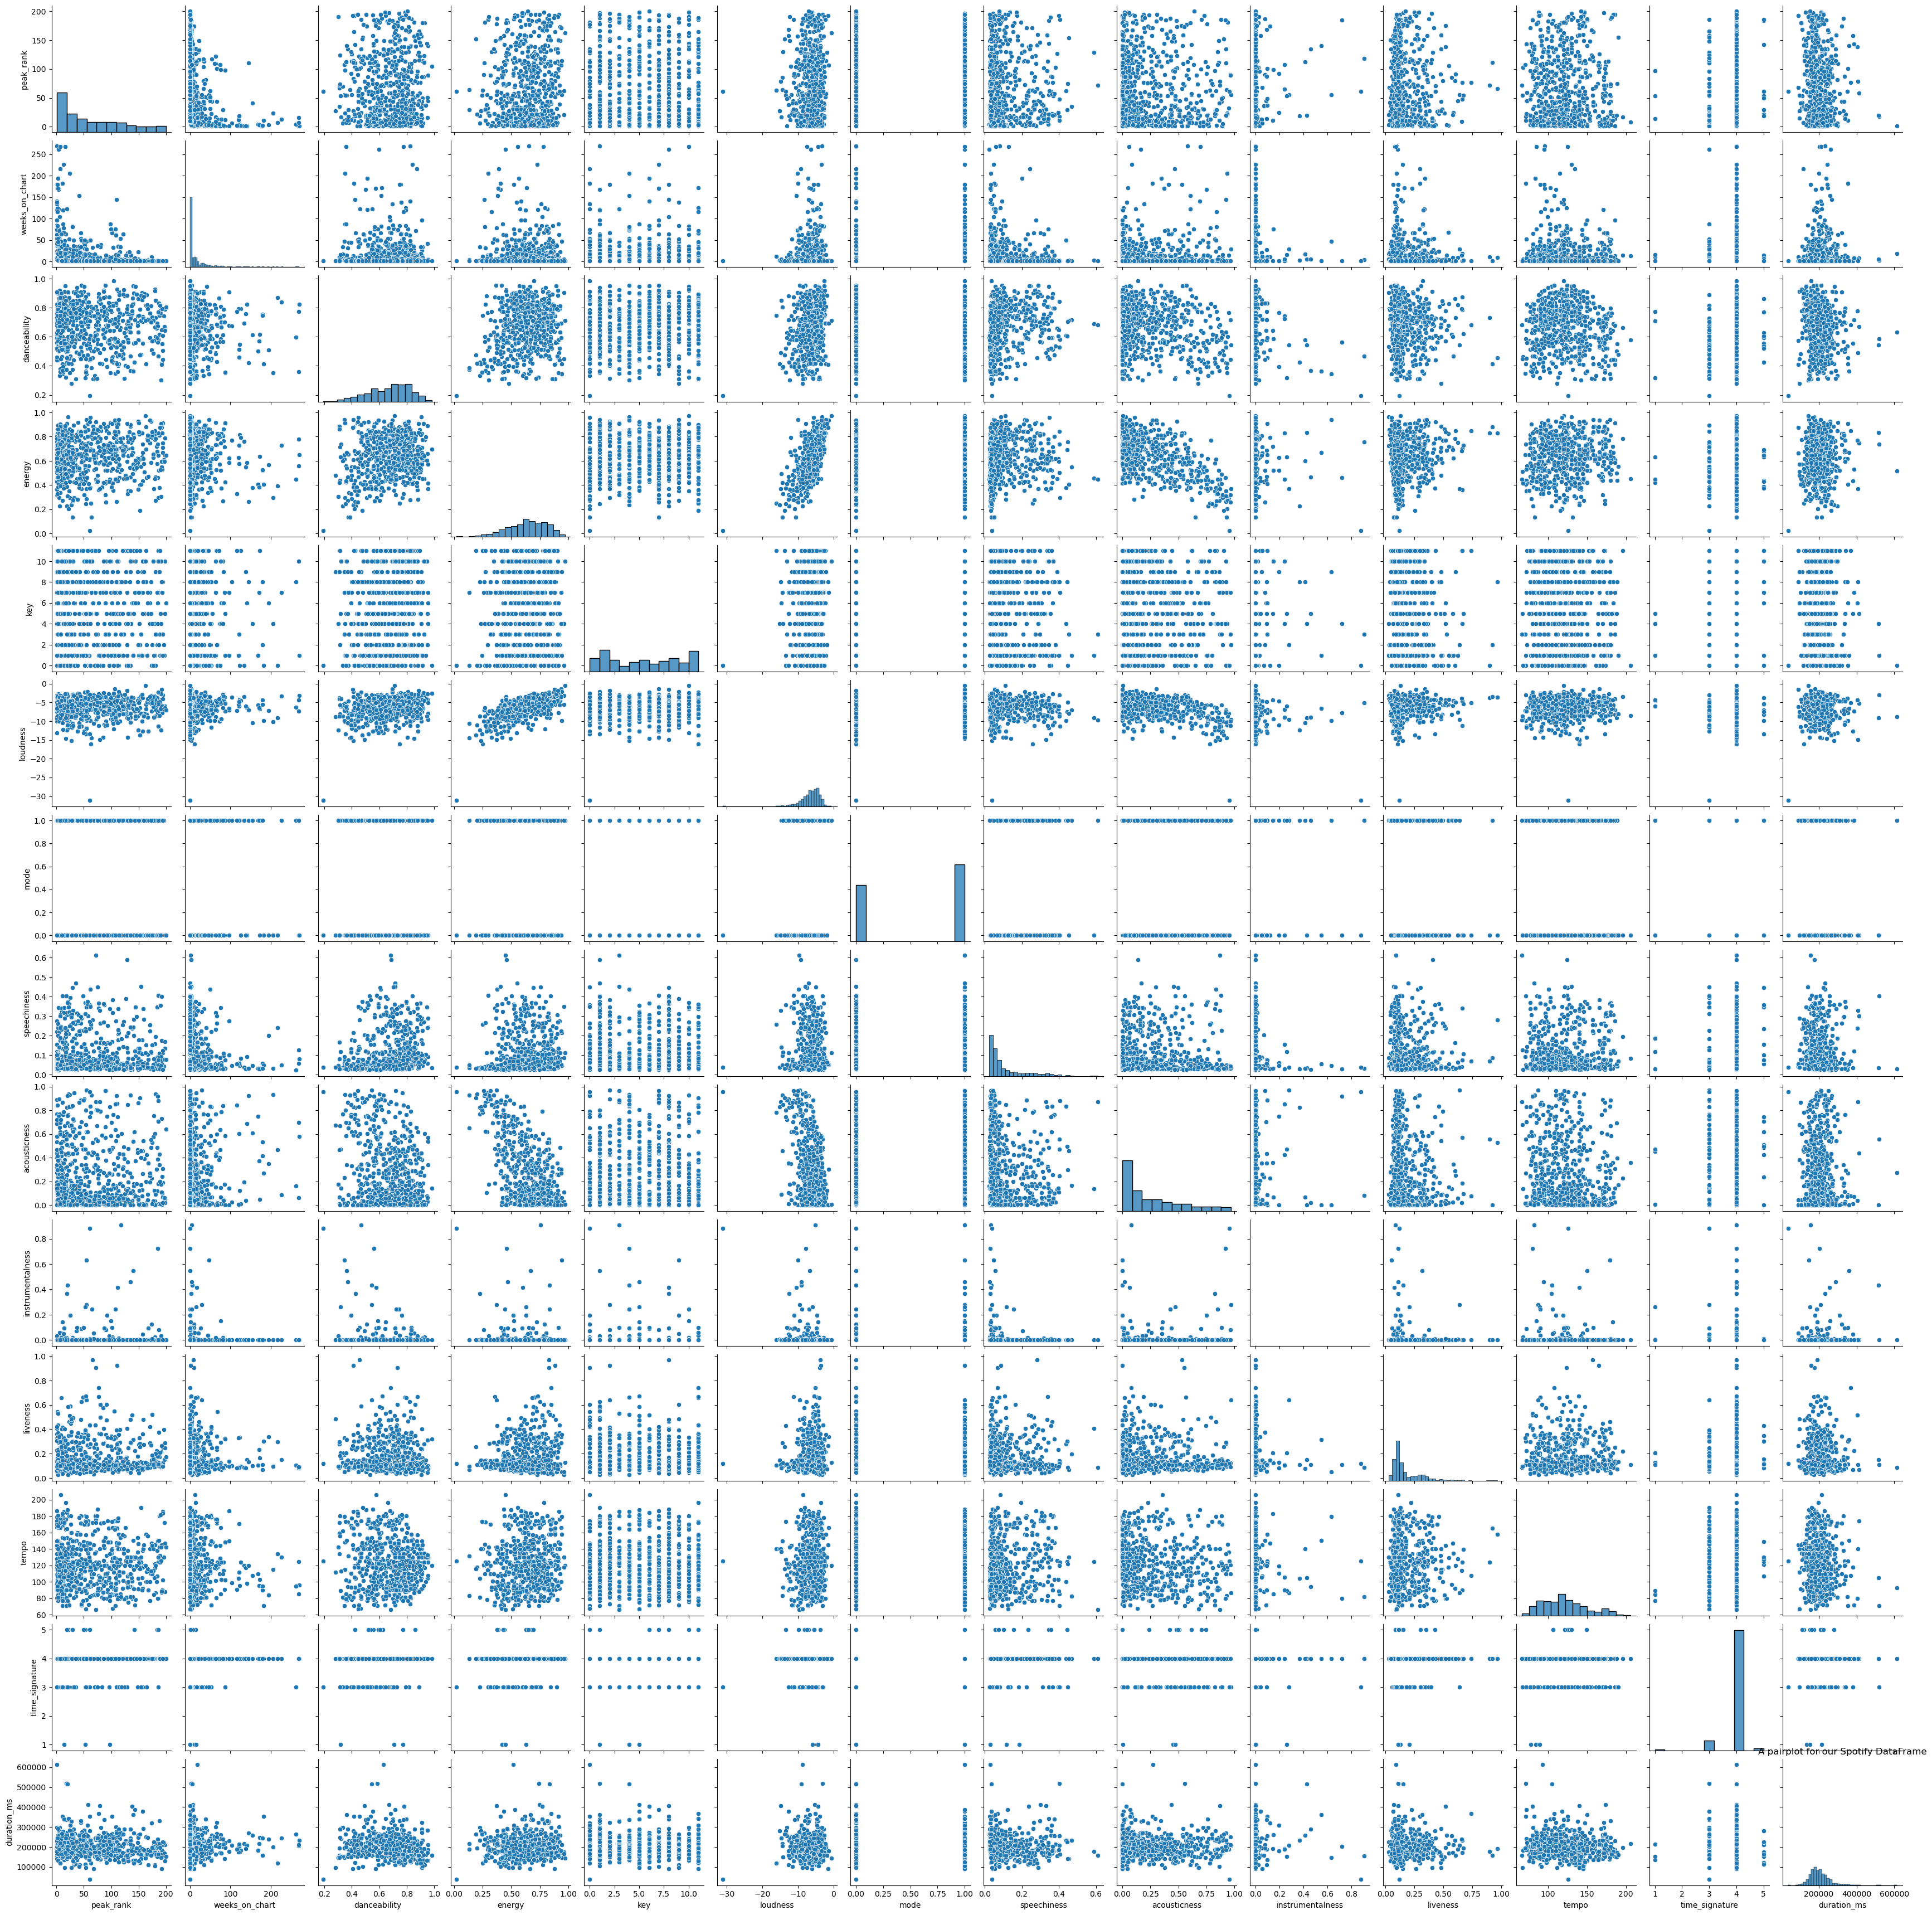

In [45]:
sns.pairplot(df)
plt.title('A pairplot for our Spotify DataFrame')

Text(0.5, 1.0, 'Cluster Map for all our features')

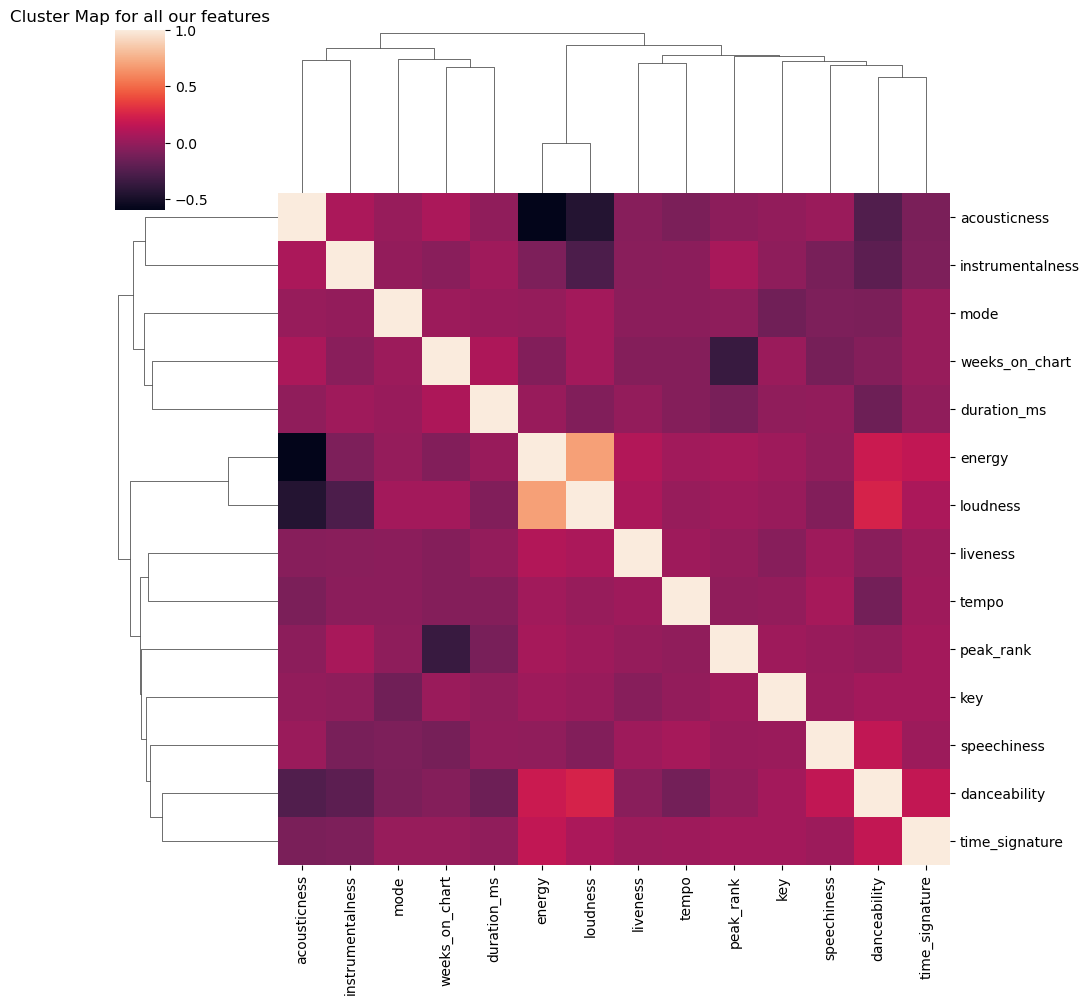

In [40]:
sns.clustermap(df.corr())
plt.title('Cluster Map for all our features')

Text(0.5, 1.0, 'A heatmap of all our features')

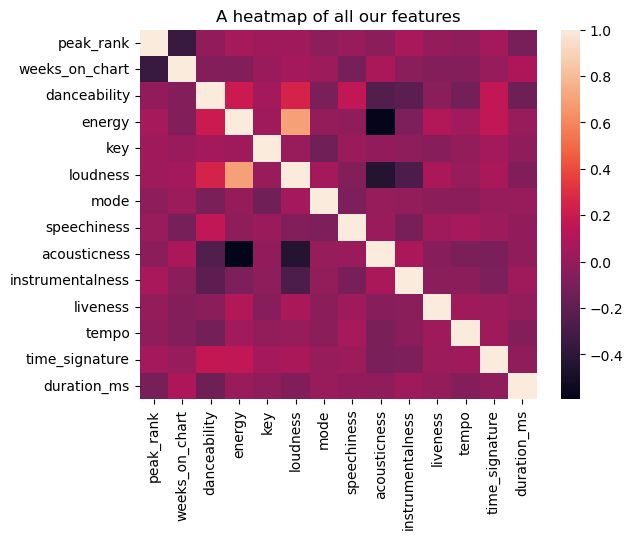

In [63]:
sns.heatmap(df.corr())
plt.title('A heatmap of all our features')

Text(0.5, 1.0, 'How Danceability determines the rank')

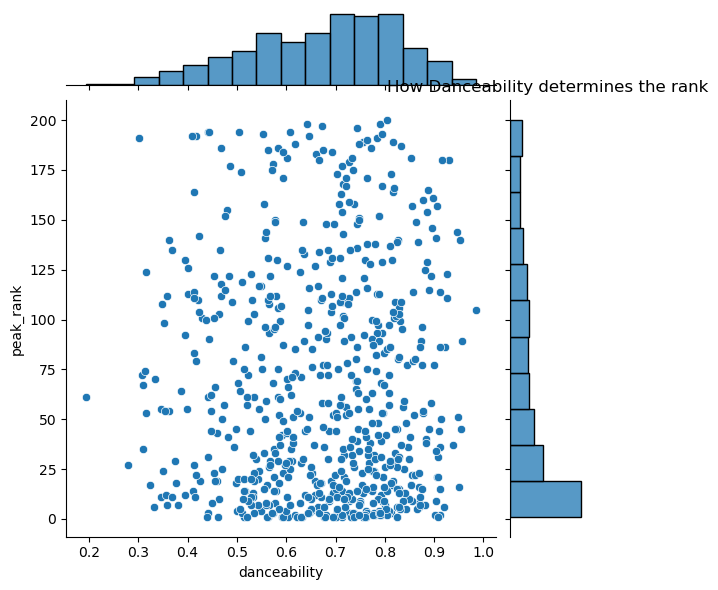

In [73]:
sns.jointplot(x=df['danceability'],y=df['peak_rank'])
plt.title('How Danceability determines the rank')
#Highly danceable music is highly ranked

Text(0.5, 1.0, 'How Acousticness  determines the rank')

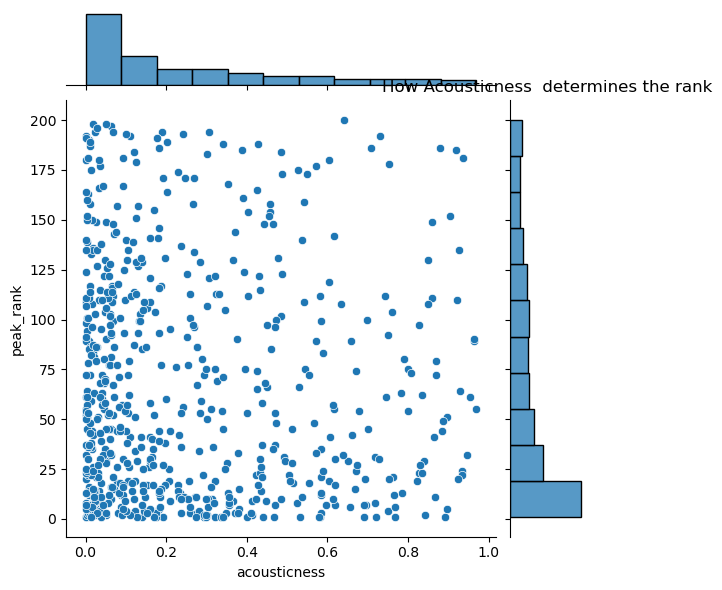

In [81]:
sns.jointplot(x=df['acousticness'],y=df['peak_rank'])
plt.title('How Acousticness  determines the rank')
# People prefer less acoustic musiv

In [ ]:
listed =['artist_names', 'track_name', 'peak_rank', 'weeks_on_chart',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature']

Text(0.5, 1.0, 'How Instrumentalness determines the rank')

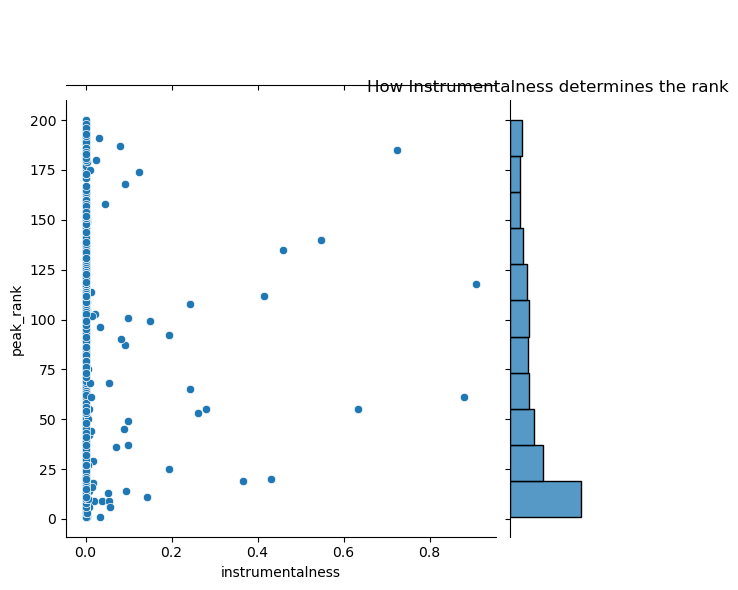

In [82]:

sns.jointplot(x=df['instrumentalness'],y=df['peak_rank'])
plt.title('How Instrumentalness determines the rank')

Text(0.5, 1.0, 'How liveness determines the rank')

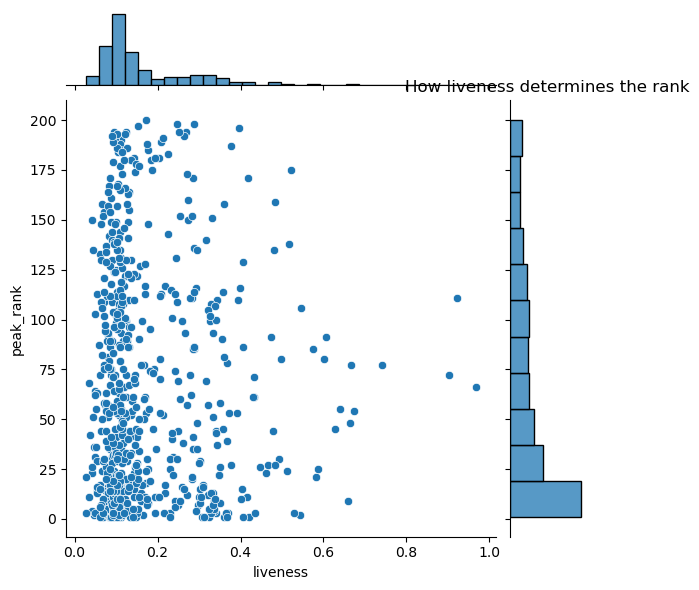

In [83]:
sns.jointplot(x=df['liveness'],y=df['peak_rank'])
plt.title('How liveness determines the rank')

Text(0.5, 1.0, 'Which key has the most ranks')

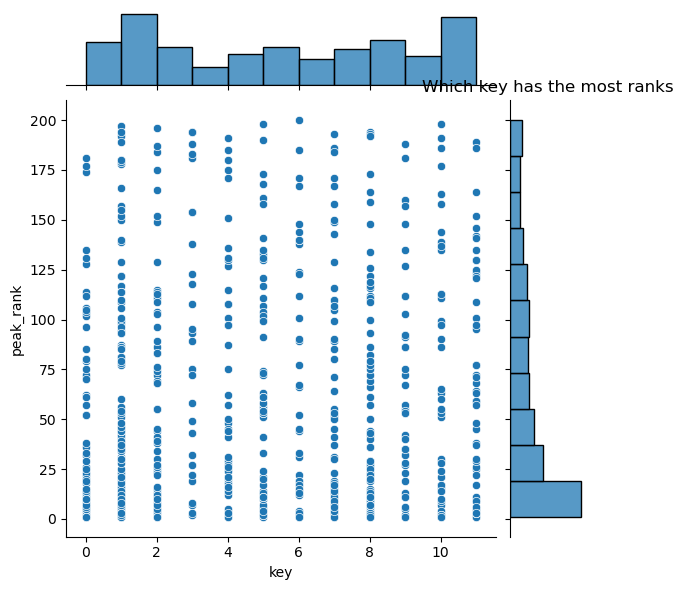

In [84]:
sns.jointplot(x=df['instrumentalness'],y=df['peak_rank'])
plt.title('How Instrumentalness determines the rank')

Text(0.5, 1.0, 'How Danceability determines the weeks on chart')

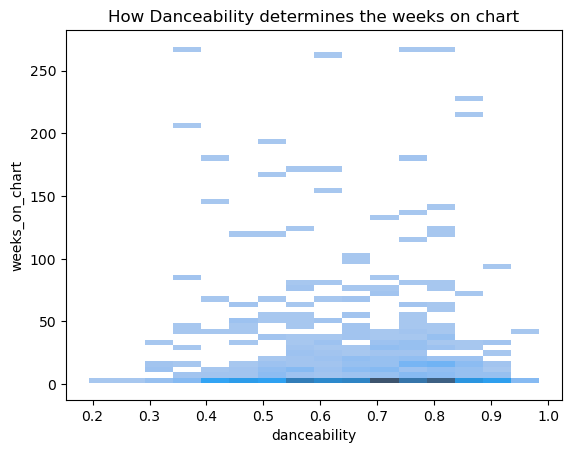

In [89]:
sns.histplot(x=df['danceability'],y=df['weeks_on_chart'])
plt.title('How Danceability determines the weeks on chart')
#Highly danceable music is highly ranked

Text(0.5, 1.0, 'How Acousticness  determines the week on chart')

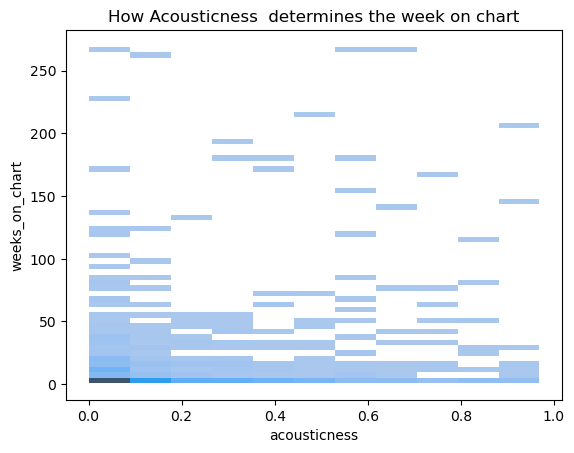

In [90]:
sns.histplot(x=df['acousticness'],y=df['weeks_on_chart'])
plt.title('How Acousticness  determines the week on chart')
# People prefer less acoustic musiv

In [103]:
df.head(10)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
139,Ed Sheeran,Shape of You,1,269,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,95.977,4,233713
198,James Arthur,Say You Won't Let Go,7,268,0.358,0.557,10,-7.398,1,0.0590,0.6950,0.000000,0.0902,85.043,4,211467
91,Imagine Dragons,Believer,16,268,0.776,0.780,10,-4.374,0,0.1280,0.0622,0.000000,0.0810,124.949,4,204347
150,Ed Sheeran,Perfect,4,262,0.599,0.448,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,95.050,3,263400
397,Travis Scott,goosebumps,13,226,0.841,0.728,7,-3.370,1,0.0484,0.0847,0.000000,0.1490,130.049,4,243837
484,XXXTENTACION,Jocelyn Flores,7,216,0.872,0.391,0,-9.144,0,0.2420,0.4690,0.000004,0.2970,134.021,4,119133
102,"Billie Eilish, Khalid",lovely (with Khalid),24,205,0.351,0.296,4,-10.109,0,0.0333,0.9340,0.000000,0.0950,115.284,4,200186
177,Juice WRLD,Lucid Dreams,3,194,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,83.903,4,239836
146,Queen,Bohemian Rhapsody - Remastered 2011,11,182,0.414,0.404,0,-9.928,0,0.0499,0.2710,0.000000,0.3000,71.105,4,354320
93,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,1,179,0.755,0.522,2,-4.368,1,0.0575,0.5330,0.000000,0.0685,89.960,4,157560


In [111]:
X = df.drop(['artist_names','track_name','peak_rank'],axis=1)
y=df['peak_rank']

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
predictions = lin_model.predict(X_test)


In [140]:
print(mean_squared_error(y_test,predictions))
print(mean_absolute_error(y_test,predictions))

3108.672294659611
46.25971630528637


In [141]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
predict = model.predict(X_test)


In [144]:
print(mean_squared_error(y_test,predict))
print(mean_absolute_error(y_test,predict))

2398.104437692308
39.98053846153846


In [145]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_pred = RF_model.predict(X_test)

In [146]:
print(mean_squared_error(y_test,RF_pred))
print(mean_absolute_error(y_test,RF_pred))

4974.5615384615385
51.73076923076923


In [147]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

In [148]:
print(mean_squared_error(y_test,nb_pred))
print(mean_absolute_error(y_test,nb_pred))

4403.623076923077
51.34615384615385


In [149]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [150]:
print(mean_squared_error(y_test,tree_pred))
print(mean_absolute_error(y_test,tree_pred))

4427.738461538462
50.784615384615385


In [152]:
df.instrumentalness.value_counts().head()

0.000000    312
0.000131      3
0.001660      3
0.001200      2
0.000106      2
Name: instrumentalness, dtype: int64